In [65]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [66]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [67]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [68]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

Downloading...
From: https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
To: /content/MM17-WeiboRumorSet.zip
1.35GB [00:20, 65.3MB/s]


Unzip and save into folder train_extracted

In [69]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [70]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [71]:
df1.head()

,filename,category
0,rumor_images/0062SQMfjw1er5h3sjsduj30go0b4mxy.jpg,1
1,rumor_images/48d702e4jw1eaemtw7ltzj20zk0e8dme.jpg,1
2,rumor_images/0067agZ4jw1es9cldrayrj308l064mx3.jpg,1
3,rumor_images/71d4be65gw1eee2e0hca7j20oc0f741e.jpg,1
4,rumor_images/005C3vAljw1ep6zsunu6pj30gd0m8ab5.jpg,1


In [72]:
len(df1) # number of rumor images

7954

In [73]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [74]:
df2.head()

,filename,category
0,nonrumor_images/593bbc68gw1eyu8xr22qwj20c80qog...,0
1,nonrumor_images/6a5ce645jw1ezu74jn618j20c8096a...,0
2,nonrumor_images/61e6c012jw1ezfi3q48epj20c8282w...,0
3,nonrumor_images/6a5ce645jw1ezefna2nokj20bv0ctd...,0
4,nonrumor_images/61e6c012jw1ezjxnp33f0j20c80he4...,0


In [75]:
len(df2) # number of non rumor images

5318

In [76]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

In [77]:
df.head()

,filename,category
0,rumor_images/0062SQMfjw1er5h3sjsduj30go0b4mxy.jpg,1
1,rumor_images/48d702e4jw1eaemtw7ltzj20zk0e8dme.jpg,1
2,rumor_images/0067agZ4jw1es9cldrayrj308l064mx3.jpg,1
3,rumor_images/71d4be65gw1eee2e0hca7j20oc0f741e.jpg,1
4,rumor_images/005C3vAljw1ep6zsunu6pj30gd0m8ab5.jpg,1


In [78]:
len(df) # combined

13272

In [79]:
df.describe()

,category
count,13272.000000
mean,0.599307
std,0.490057
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [80]:
df.tail()

,filename,category
13267,nonrumor_images/66eeadffjw1eynry1ltilj20go0m8d...,0
13268,nonrumor_images/6a5ce645jw1ezefndxpnnj20c50bwg...,0
13269,nonrumor_images/470bf257jw1eue540s1zuj20hr0e6j...,0
13270,nonrumor_images/6693ce84gw1ez0r8sv77oj20c836zh...,0
13271,nonrumor_images/625ab309jw1eyhkiz1jmkj20bl0gnm...,0


Total count

In [81]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


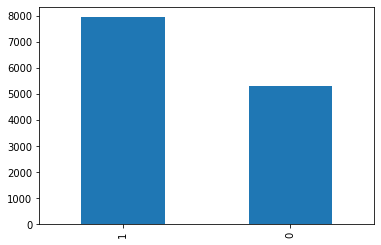

In [82]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [83]:
# shuffle the DataFrame rows 
df = df.sample(frac = 1).reset_index(drop=True) 

In [84]:
df.head()

,filename,category
0,nonrumor_images/63207a53jw1ezu5w9vmm1j20c809a3...,0
1,nonrumor_images/620beb06gw1eznhqaixltj20c80c8a...,0
2,nonrumor_images/0065vuzcjw1exnnp4raypj30c80c8j...,0
3,nonrumor_images/470bf257gw1ev900k7h0jj20gj0gkq...,0
4,rumor_images/93dad53fjw1es81zh6g87j20f00qojsk.jpg,1


In [85]:
df.tail()

,filename,category
13267,rumor_images/9dcceeefjw1es88yu8gwmj20xc18gtht.jpg,1
13268,rumor_images/8c30bcc9jw1ep6cjbj89pj20p018g0yx.jpg,1
13269,rumor_images/6d8450b9jw1e0lc9tl1m5j.jpg,1
13270,nonrumor_images/6693ce84gw1eyyykr9wcbj20c80lst...,0
13271,rumor_images/006arIsYjw1ev14i3xwwmj30hs0vk0vh.jpg,1


Make a combined list with rumor and non rumor image paths last part

In [86]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [87]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

nonrumor_images/63207a53jw1ezu5w9vmm1j20c809a3zk.jpg
0
rumor_images/006arIsYjw1ev14i3xwwmj30hs0vk0vh.jpg
1


rumor_images/005YPqw6jw1etv8znodozj30et0m8ac4.jpg


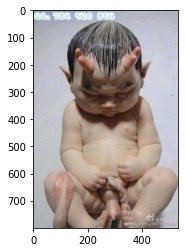

In [88]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

Build Model


Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [89]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               65028608  
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)              

Callbacks

In [90]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [91]:
earlystop = EarlyStopping(patience=10)

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [92]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [93]:
callbacks = [earlystop, learning_rate_reduction]

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to rumor and 0 to nonrumor

In [94]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'}) 

In [95]:
df.head()

,filename,category
0,nonrumor_images/63207a53jw1ezu5w9vmm1j20c809a3...,nonrumor
1,nonrumor_images/620beb06gw1eznhqaixltj20c80c8a...,nonrumor
2,nonrumor_images/0065vuzcjw1exnnp4raypj30c80c8j...,nonrumor
3,nonrumor_images/470bf257gw1ev900k7h0jj20gj0gkq...,nonrumor
4,rumor_images/93dad53fjw1es81zh6g87j20f00qojsk.jpg,rumor


Divide into 80% train and 20% test, Note that we have shuffled earlier

In [96]:
mid = int(len(df)*0.8)
df_train = df[:mid]
df_test = df[mid:]
print(len(df_train))
print(len(df_test))

10617
2655


In [97]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

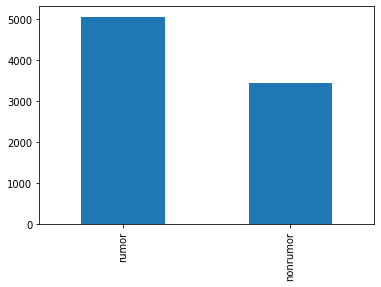

In [98]:
train_df['category'].value_counts().plot.bar()

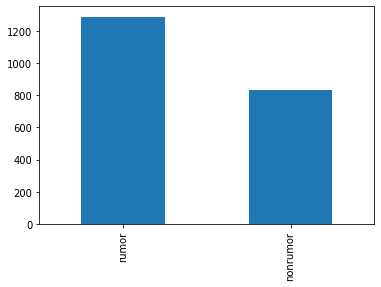

In [99]:
validate_df['category'].value_counts().plot.bar()

In [100]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

Traning Generator

In [101]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8477 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 16 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Validation Generator

In [102]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2121 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


See how our generator work

In [103]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


Seems great

Fit Model

In [104]:
FAST_RUN = False

In [41]:
epochs=3 if FAST_RUN else 20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
566/566 [==============================] - 110s 194ms/step - loss: 0.9429 - accuracy: 0.5629 - val_loss: 0.6493 - val_accuracy: 0.6212
Epoch 2/20
566/566 [==============================] - 109s 192ms/step - loss: 0.7096 - accuracy: 0.5798 - val_loss: 0.6655 - val_accuracy: 0.6132
Epoch 3/20
566/566 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.5897
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
566/566 [==============================] - 108s 191ms/step - loss: 0.6844 - accuracy: 0.5897 - val_loss: 0.6477 - val_accuracy: 0.6065
Epoch 4/20
566/566 [==============================] - 107s 190ms/step - loss: 0.6593 - accuracy: 0.6039 - val_loss: 0.6372 - val_accuracy: 0.6222
Epoch 5/20
566/566 [==============================] - 106s 188ms/step - loss: 0.6515 - accuracy: 0.6061 - val_loss: 0.6298 - val_accuracy: 0.6435
Epoch 6/20
566/566 [=========

Save Model

In [42]:
model.save_weights("model.h5")

In [106]:
model.save_weights("1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020Rumor_Nonrumor_50epochs_model.h5")

In [107]:
# saving the dataframe 
df.to_csv('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_5331.csv') 

In [108]:
# saving the dataframe 
df_train.to_csv('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_train_5331.csv')
# saving the dataframe 
df_test.to_csv('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_test_5331.csv') 

In [109]:
from google.colab import files
files.download('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020Rumor_Nonrumor_50epochs_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
files.download('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_5331.csv') 
files.download('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_train_5331.csv') 
files.download('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020df_test_5331.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Visualize Training

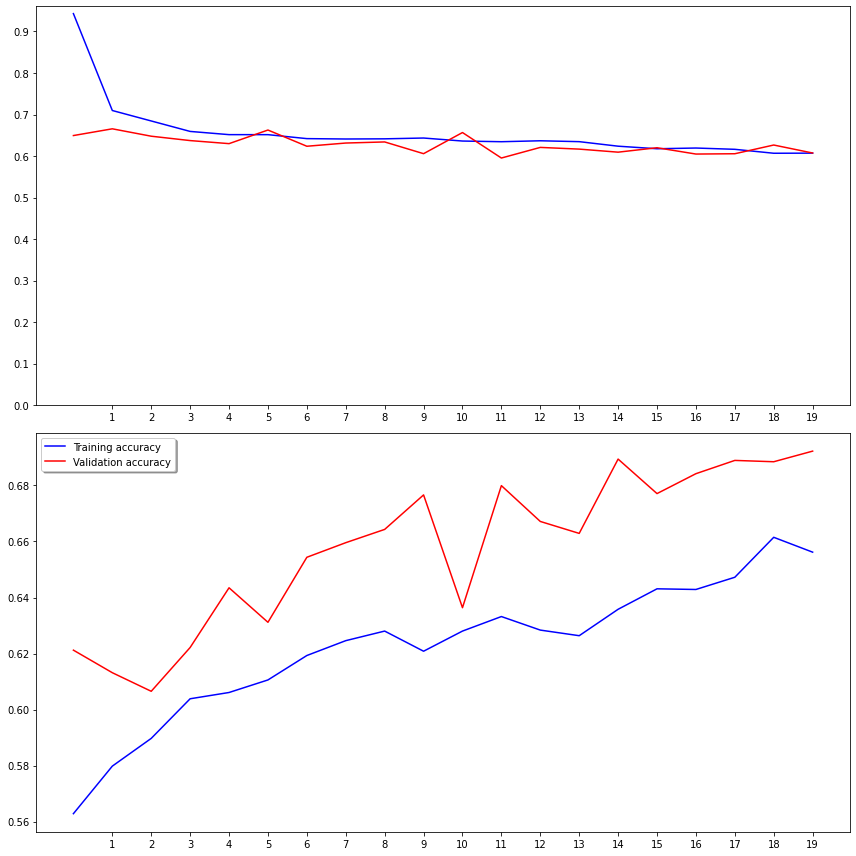

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Prepare Testing Data

In [50]:
df_test.head()


,filename,category
10617,rumor_images/9df2de2djw1ev0s31vivtj20hs0nq0ta.jpg,rumor
10618,rumor_images/72c924eajw1e1be1fr2zmj.jpg,rumor
10619,rumor_images/005xOb42jw1et82utuplgj318g0xcap7.jpg,rumor
10620,nonrumor_images/707e96d5gw1eznen104swj20ev0ns0...,nonrumor
10621,rumor_images/612364a3jw1e3w2vtklgzj20og0fwtau.jpg,rumor


In [51]:
df_test = df_test.reset_index(drop = True)

In [52]:
test_filenames = []
test_categories = []
for i in range(0,len(df_test)):
  test_filenames.append(df_test['filename'][i])
  test_categories.append(df_test['category'][i])
print(len(test_filenames))

2655


In [53]:
test_df = df_test
nb_samples = test_df.shape[0]

Create Testing Generator

In [54]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
    validate_filenames=False
)

Found 2655 non-validated image filenames.


Predict

In [55]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [56]:
print(predict)

[[0.04492794 0.95507205]
 [0.49207997 0.50792   ]
 [0.60963845 0.39036158]
 ...
 [0.5947728  0.4052272 ]
 [0.07197713 0.9280228 ]
 [0.2506096  0.7493904 ]]


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [57]:
test_df['category_predicted'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [58]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category_predicted'] = test_df['category_predicted'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [59]:
test_df['category_predicted'] = test_df['category_predicted'].replace({ 'rumor': 1, 'nonrumor': 0 })
test_df['category'] = test_df['category'].replace({ 'rumor': 1, 'nonrumor': 0 })

Virtaulize Result

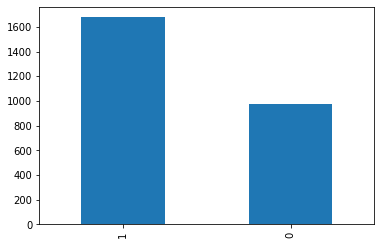

In [60]:
test_df['category_predicted'].value_counts().plot.bar()

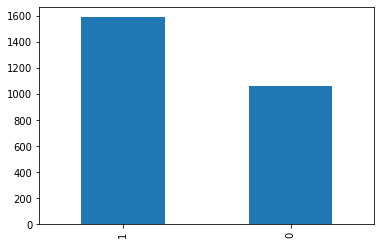

In [61]:
test_df['category'].value_counts().plot.bar()

In [62]:
y_pred = test_df['category_predicted']
y_true = test_df['category']

In [63]:
from sklearn.metrics import accuracy_score # normal accuracy
from sklearn.metrics import balanced_accuracy_score # used in case of imbalanced data sets, average of recall, from 0 to 1
from sklearn.metrics import confusion_matrix # division of performance on the multilabels
from sklearn.metrics import cohen_kappa_score # compares model against random prediction, from -1 to 1
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['class 0', 'class 1']

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:" , balanced_accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))
    
print('CNN Only')
print_metrics(y_true, y_pred)

CNN Only
Accuracy: 0.6836158192090396
Balanced Accuracy: 0.6639458679697358
Confusion Matrix:
 [[ 601  463]
 [ 377 1214]]
Cohen Kappa Score: 0.3323406158560571
Classification Report:
               precision    recall  f1-score   support

     class 0       0.61      0.56      0.59      1064
     class 1       0.72      0.76      0.74      1591

    accuracy                           0.68      2655
   macro avg       0.67      0.66      0.67      2655
weighted avg       0.68      0.68      0.68      2655



In [111]:
# saving the dataframe of our results
test_df.to_csv('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020test_df_5331.csv') 
files.download('1_Conv_layers_1_COMP5331_Initial_Full_Classifier_Ayush_10102020test_df_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>